In [1]:
import os 
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import tree
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



In [2]:
BCdata = pd.read_csv("C:/Users/youss/Desktop/Bmen 415 project/BCData.csv")
BCdata

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
BCdata.drop('id', axis = 1, inplace = True)
BCdata.diagnosis = [1 if each =='M' else 0 for each in BCdata.diagnosis]
BCdata

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
Y = BCdata.diagnosis
X = BCdata.drop('diagnosis', axis = 1)
X.shape, Y.shape

((569, 30), (569,))

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size =0.2)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X,Y)
KNeighborsClassifier(...)


KNeighborsClassifier(n_neighbors=Ellipsis)

In [7]:
y_pred_test_neigh = neigh.predict(X_test)
y_pred_train_neigh = neigh.predict(X_train)
print('Training accuracy for k nearest neighbors:', neigh.score(X_train, Y_train))
print('Testing accuracy for k nearest neighbors:', neigh.score(X_test, Y_test))
print('Model accuracy for k nearest neighbors:', accuracy_score(Y_test, y_pred_test_neigh))
print('Precision for k nearest neighbors', metrics.precision_score(Y_test, y_pred_test_neigh))
print(classification_report(Y_test,y_pred_test_neigh, target_names = ['Malignant','Benign']))

Training accuracy for k nearest neighbors: 0.9516483516483516
Testing accuracy for k nearest neighbors: 0.9736842105263158
Model accuracy for k nearest neighbors: 0.9736842105263158
Precision for k nearest neighbors 0.9705882352941176
              precision    recall  f1-score   support

   Malignant       0.97      0.99      0.98        79
      Benign       0.97      0.94      0.96        35

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [8]:
confusion_matrix(Y_test,y_pred_test_neigh, labels=[1, 0])

array([[33,  2],
       [ 1, 78]], dtype=int64)

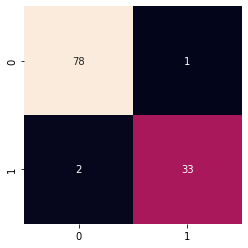

In [9]:
confusion_matrix_neigh = confusion_matrix(Y_test, y_pred_test_neigh)
sns.heatmap(confusion_matrix_neigh, square=True, annot=True, fmt='d', cbar=False)
plt.show()

In [10]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X,Y)
LinearDiscriminantAnalysis()


LinearDiscriminantAnalysis()

In [11]:
y_pred_test_LDA = LDA.predict(X_test)
y_pred_train_LDA = LDA.predict(X_train)
print('Training accuracy for Linear Discriminant analysis :', LDA.score(X_train, Y_train))
print('Testing accuracy for Linear Discriminant analysis:', LDA.score(X_test, Y_test))
print('Model accuracy for Linear Discriminant analysis:', accuracy_score(Y_test, y_pred_test_LDA))
print('Precision for Linear Discriminant analysis:', metrics.precision_score(Y_test, y_pred_test_LDA))
print(classification_report(Y_test,y_pred_test_LDA, target_names = ['Malignant','Benign']))

Training accuracy for Linear Discriminant analysis : 0.9626373626373627
Testing accuracy for Linear Discriminant analysis: 0.9736842105263158
Model accuracy for Linear Discriminant analysis: 0.9736842105263158
Precision for Linear Discriminant analysis: 0.9705882352941176
              precision    recall  f1-score   support

   Malignant       0.97      0.99      0.98        79
      Benign       0.97      0.94      0.96        35

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



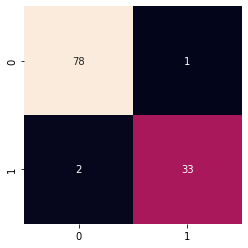

In [12]:
confusion_matrix_LDA = confusion_matrix(Y_test, y_pred_test_LDA)
sns.heatmap(confusion_matrix_LDA, square=True, annot=True, fmt='d', cbar=False)
plt.show()

In [13]:
GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
...     max_depth=1, random_state=0).fit(X_train, Y_train)
>>> y_pred_test_GBC = GBC.predict(X_test)
y_pred_train_LDA = GBC.predict(X_train)
print('Training accuracy for Gradient Boosting Classifier :', GBC.score(X_train, Y_train))
print('Testing accuracy for Gradient Boosting Classifier:', GBC.score(X_test, Y_test))
print('Model accuracy for Gradient Boosting Classifier:', accuracy_score(Y_test, y_pred_test_GBC))
print('Precision for Gradient Boosting Classifier:', metrics.precision_score(Y_test, y_pred_test_GBC))
print(classification_report(Y_test,y_pred_test_GBC, target_names = ['Malignant','Benign']))

Training accuracy for Gradient Boosting Classifier : 1.0
Testing accuracy for Gradient Boosting Classifier: 0.9736842105263158
Model accuracy for Gradient Boosting Classifier: 0.9736842105263158
Precision for Gradient Boosting Classifier: 0.9444444444444444
              precision    recall  f1-score   support

   Malignant       0.99      0.97      0.98        79
      Benign       0.94      0.97      0.96        35

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



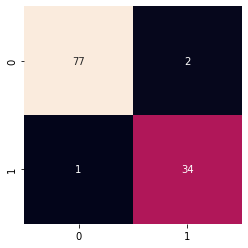

In [14]:
confusion_matrix_GBC = confusion_matrix(Y_test, y_pred_test_GBC)
sns.heatmap(confusion_matrix_GBC, square=True, annot=True, fmt='d', cbar=False)
plt.show()